In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
# 데이터 불러오기
free_apps = pd.read_csv('Free_apps.csv')
grossing_apps = pd.read_csv('Grossing_apps.csv')

In [3]:
# 데이터 병합
apps_data = pd.concat([free_apps, grossing_apps])

# 중복된 행 제거
apps_data = apps_data.drop_duplicates(subset=['App ID'])

In [4]:
# 필요한 열만 선택
apps_data = apps_data[['Category', 'Description']]

In [5]:
# 결측치 제거
apps_data.dropna(subset=['Category', 'Description'], inplace=True)

In [6]:
# 라벨 인코딩 (Category를 숫자로 변환)
label_encoder = LabelEncoder()
apps_data['Category_encoded'] = label_encoder.fit_transform(apps_data['Category'])

In [7]:
# TF-IDF 벡터화
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_tfidf = vectorizer.fit_transform(apps_data['Description'])
y = apps_data['Category_encoded']

In [8]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)


# Naive Bayes

In [9]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

In [10]:
# 나이브 베이즈 모델 학습
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

MultinomialNB()

In [11]:
# 예측 및 평가
y_pred_nb = nb_model.predict(X_test)
print("Naïve Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Naïve Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))


Naïve Bayes Accuracy: 0.45
Naïve Bayes Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           5       1.00      0.50      0.67         2
           6       0.42      1.00      0.59         8
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         2
          16       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         1

    accuracy                           0.45        20
   macro avg       0.13      0.14      0.11        20
weighted avg       0.27      0.45      0.30        20



c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# SVC

In [12]:
from sklearn.svm import SVC


In [13]:
# SVM 모델 학습
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)


SVC(kernel='linear')

In [14]:
# 예측 및 평가
y_pred_svm = svm_model.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.65
SVM Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           5       0.40      1.00      0.57         2
           6       0.80      1.00      0.89         8
           8       1.00      1.00      1.00         1
           9       0.50      1.00      0.67         1
          10       0.50      1.00      0.67         1
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         2
          16       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         1

    accuracy                           0.65        20
   macro avg       0.29      0.45      0.34        20
weighted avg       0.46      0.65      0.53        20



c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Random Forest

In [15]:
from sklearn.ensemble import RandomForestClassifier

In [16]:
# 랜덤 포레스트 모델 학습
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [17]:
# 예측 및 평가
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.65
Random Forest Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           5       1.00      1.00      1.00         2
           6       0.80      1.00      0.89         8
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          10       0.50      1.00      0.67         1
          13       1.00      1.00      1.00         1
          14       1.00      0.50      0.67         2
          16       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         1

    accuracy                           0.65        20
   macro avg       0.39      0.41      0.38        20
weighted avg       0.59      0.65      0.61        20



c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
# 로지스틱 회귀 모델 학습
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [20]:
# 예측 및 평가
y_pred_lr = lr_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.55
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           5       0.67      1.00      0.80         2
           6       0.53      1.00      0.70         8
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          14       1.00      0.50      0.67         2
          16       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         1

    accuracy                           0.55        20
   macro avg       0.20      0.23      0.20        20
weighted avg       0.38      0.55      0.42        20



c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [21]:
# 새로운 설명 데이터
new_descriptions = [
    "A fun and addictive game with multiple levels and challenges.",
    "A personal finance app to manage your expenses and track your budget."
]

# TF-IDF 변환
new_descriptions_tfidf = vectorizer.transform(new_descriptions)

In [22]:
# 각 모델에 대해 예측
predicted_nb = label_encoder.inverse_transform(nb_model.predict(new_descriptions_tfidf))
predicted_svm = label_encoder.inverse_transform(svm_model.predict(new_descriptions_tfidf))
predicted_rf = label_encoder.inverse_transform(rf_model.predict(new_descriptions_tfidf))
predicted_lr = label_encoder.inverse_transform(lr_model.predict(new_descriptions_tfidf))


In [23]:
# 결과 출력
print("Naïve Bayes Predictions:", predicted_nb)
print("SVM Predictions:", predicted_svm)
print("Random Forest Predictions:", predicted_rf)
print("Logistic Regression Predictions:", predicted_lr)

Naïve Bayes Predictions: ['Finance' 'Finance']
SVM Predictions: ['Entertainment' 'Lifestyle']
Random Forest Predictions: ['Travel & Local' 'Health & Fitness']
Logistic Regression Predictions: ['Entertainment' 'Finance']


# Category Clustering

In [24]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [25]:
# 클러스터링 수행 (예: 7개의 클러스터)
kmeans = KMeans(n_clusters=7, random_state=42)
clusters = kmeans.fit_predict(X_tfidf)

In [26]:
# 클러스터 결과를 데이터프레임에 추가
apps_data['Cluster'] = clusters

In [27]:
# 결과 확인
print(apps_data[['Category', 'Cluster']].head())

                  Category  Cluster
0  Video Players & Editors        0
1         Health & Fitness        6
2                 Shopping        0
3                   Social        0
4                  Finance        5


In [29]:
# PCA로 차원 축소 후 시각화
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(X_tfidf.toarray())

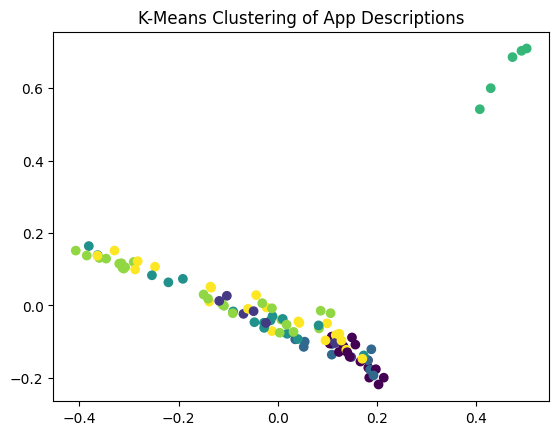

In [30]:
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=clusters, cmap='viridis')
plt.title('K-Means Clustering of App Descriptions')
plt.show()

In [36]:
# 클러스터별로 카테고리 확인
for cluster_num in range(7):  # 클러스터 개수에 맞게 조정
    print(f"Cluster {cluster_num}:")
    cluster_data = apps_data[apps_data['Cluster'] == cluster_num]
    print(cluster_data['Category'].value_counts())
    print("\n")

Cluster 0:
Category
Shopping                   3
Social                     3
Entertainment              3
Video Players & Editors    2
Travel & Local             1
Productivity               1
Music & Audio              1
Education                  1
Name: count, dtype: int64


Cluster 1:
Category
Shopping             3
Lifestyle            3
Travel & Local       1
Maps & Navigation    1
Name: count, dtype: int64


Cluster 2:
Category
Entertainment       5
Shopping            1
News & Magazines    1
Food & Drink        1
Music & Audio       1
Name: count, dtype: int64


Cluster 3:
Category
Finance                    5
Travel & Local             4
Shopping                   2
Maps & Navigation          1
Communication              1
Lifestyle                  1
Auto & Vehicles            1
Video Players & Editors    1
Name: count, dtype: int64


Cluster 4:
Category
Productivity    3
Tools           2
Name: count, dtype: int64


Cluster 5:
Category
Finance              9
Tools          

## Category Similarities

In [38]:
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
# 카테고리별 TF-IDF 특징 계산
category_features = apps_data.groupby('Category')['Description'].apply(lambda x: ' '.join(x))
category_tfidf = vectorizer.transform(category_features)

In [33]:
# 코사인 유사도 계산
similarity_matrix = cosine_similarity(category_tfidf)

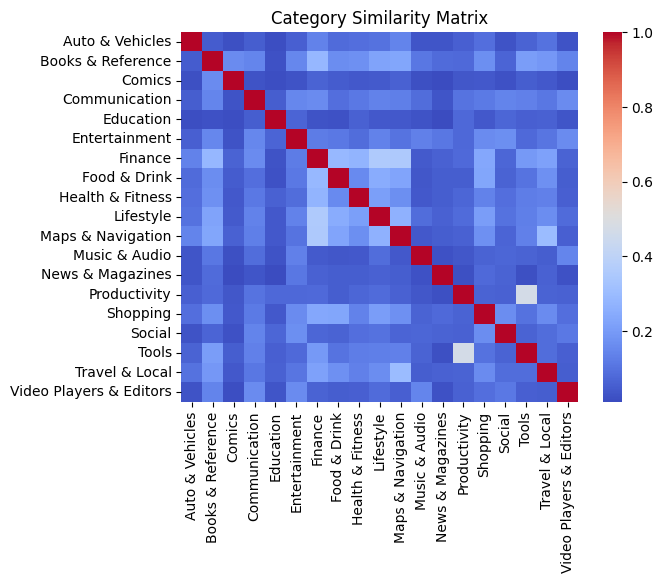

In [35]:
# 유사도 매트릭스 시각화
sns.heatmap(similarity_matrix, xticklabels=category_features.index, yticklabels=category_features.index, cmap='coolwarm')
plt.title('Category Similarity Matrix')
plt.show()

In [39]:
# 카테고리별로 Description을 하나로 합침
category_features = apps_data.groupby('Category')['Description'].apply(lambda x: ' '.join(x))
category_tfidf = vectorizer.transform(category_features)

In [40]:
# 코사인 유사도 계산
similarity_matrix = cosine_similarity(category_tfidf)

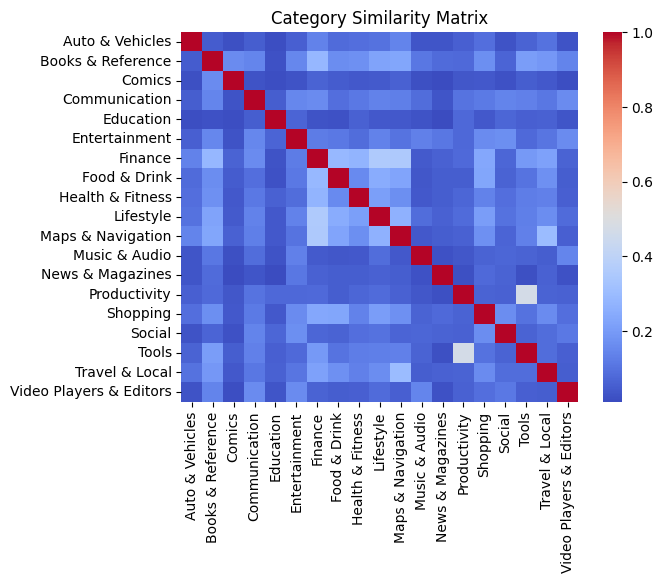

In [41]:
# 유사도 매트릭스 시각화
sns.heatmap(similarity_matrix, xticklabels=category_features.index, yticklabels=category_features.index, cmap='coolwarm')
plt.title('Category Similarity Matrix')
plt.show()